In [1]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
import operator
from itertools import islice
from tabulate import tabulate
import seaborn as sns
import re

In [2]:
tweets = %cypher match  (n:tweet)<-[r :TWEETS]-(n2:user) where n.lang = 'en' return n.text  as text

944434 rows affected.


In [3]:
stop_words_ = set(stopwords.words('english'))  
new_set = set(['000', 'de', 'rt', 'http', 'https', 'amp', '1', '25', 'pm', '2', 'rtudf0a', 'udf0a', 'lifeudc68udfff', 'udfa4udc69udffb', 'udfa8', 'udf08udf37udf3audd16', 'lmaooooooooooooooooooooooooooooooooooooooooooooude02ude02', 'udf31small', 'it’s' ])
stop_words_ = stop_words_.union(new_set)

In [4]:
def getNGram(text, n, stop_words, m):
    punct_signs = list(string.punctuation)
    punct_signs.append('…')
    punct_signs.append('¿')
    for p in punct_signs:
        text = text.replace(p, ' ')
    clean_text = text.lower().split()
    clean_text = [w for w in clean_text if w not in stop_words_]
    total = len(clean_text)
    h_dict = {}   
    ngramas = ngrams(clean_text, n)
    for grams in ngramas:
        words = ' '.join(grams)        
        words = words.strip() 
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    if m >=1:
        results = list(islice(sorted_dict,  m))
        results = [(v[0], v[1], v[1] * 100 / total) for v in results]
        return results
    else:
        return list(islice(sorted_dict, None))
    
def clean_tweets(tweets):
    patternUrl = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    patternUsers =  re.compile('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    patternTags = re.compile('#(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    allTweets = pd.Series(tweets).str.cat(sep='\n')
    allTweets = patternUrl.sub('', allTweets) #removing urls 
    allTweets = patternUsers.sub('', allTweets) #removing users
    allTweets = patternTags.sub('', allTweets) #removing tags
    return allTweets

In [5]:
allTweets = clean_tweets(tweets.get_dataframe().text)

## Top 30 unigrams in Tweets

In [6]:
final = getNGram(allTweets, 1, stop_words_, 30)
print(tabulate(final, ['Ngram', 'Number', '% of the total (without stopwords)']))

Ngram       Number    % of the total (without stopwords)
--------  --------  ------------------------------------
people      154532                              1.51016
black       129951                              1.26994
killed      120889                              1.18139
think       114575                              1.11968
police      111280                              1.08748
continue    105051                              1.02661
tv          102914                              1.00572
armed       101430                              0.991222
gets        100812                              0.985183
they’re      99166                              0.969098
campus       98858                              0.966088
rifle        98489                              0.962482
brings       97980                              0.957507
pla          97715                              0.954918
school       87727                              0.85731
gun          63704                     

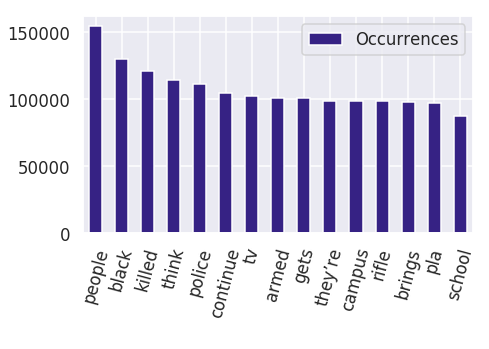

In [7]:
sns.set_context('talk')
sns.set_style('darkgrid')
columns = ['Ngram', 'Occurrences', '% of total']

dfnGrams = pd.DataFrame([x for x in final], columns=columns)

dfnGrams = dfnGrams[['Ngram', 'Occurrences']][:15]
dfnGrams =  dfnGrams.set_index('Ngram')
ax = dfnGrams.plot(kind='bar',  use_index=True, color='#362284', rot=75, figsize=(7, 4))
ax.set_xlabel(" ");
plt.savefig('Popular_unigramsPurple.png', format='png', dpi=600, bbox_inches = 'tight' )
plt.show()

## Top 30 bigrams 

In [8]:
final2 = getNGram(allTweets, 2, stop_words_, 30)
print(tabulate(final2, ['Ngram', 'Number', '% of the total without stopwords']))

Ngram               Number    % of the total without stopwords
----------------  --------  ----------------------------------
black people         99216                            0.969586
killed police        97786                            0.955612
people continue      97714                            0.954908
think they’re        97711                            0.954879
gets tv              97701                            0.954781
rifle campus         97697                            0.954742
police think         97693                            0.954703
campus gets          97688                            0.954654
they’re armed        97688                            0.954654
brings rifle         97686                            0.954634
continue killed      97685                            0.954625
armed brings         97684                            0.954615
tv pla               97683                            0.954605
santa fe             30177                            0

## Top 30 trigramas 

In [9]:
final3 = getNGram(allTweets, 3, stop_words_, 30)
print(tabulate(final3, ['Ngram', 'Number', '% of the total without stopwords']))

Ngram                     Number    % of the total without stopwords
----------------------  --------  ----------------------------------
rifle campus gets          97686                           0.954634
brings rifle campus        97686                           0.954634
campus gets tv             97686                           0.954634
killed police think        97686                           0.954634
think they’re armed        97685                           0.954625
police think they’re       97685                           0.954625
continue killed police     97684                           0.954615
armed brings rifle         97684                           0.954615
black people continue      97684                           0.954615
they’re armed brings       97684                           0.954615
people continue killed     97684                           0.954615
gets tv pla                97683                           0.954605
santa fe high              12374              